In [1]:
# Import library
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [25]:
df = pd.read_csv('C:\\Users\\danh.phan\\Downloads\\ga_scrutiny-python_input_2-2018-10-29-05-54-57.csv')
print(df.shape)
# Data summary
df.describe().transpose()

(104434, 13)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,104434.0,5.221650e+04,3.014764e+04,0.000000e+00,2.610825e+04,5.221650e+04,7.832475e+04,1.044330e+05
FULLVISITORID,104434.0,4.635025e+18,2.662784e+18,9.828755e+13,2.338622e+18,4.640515e+18,6.944718e+18,9.223246e+18
PROPORTION_SEARCH_SALE,104434.0,8.962894e-02,1.931289e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.892470e-01
PROPORTION_SEARCH_LEASE,104434.0,6.359966e-02,1.674646e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.920320e-01
PROPORTION_SEARCH_SOLD,104434.0,4.131047e-03,4.233213e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.333330e-01
PROPORTION_SEARCH_BUSINESS,104434.0,7.116815e-02,1.909811e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.777780e-01
PROPORTION_LISTING_SALE,104434.0,3.094532e-01,4.034841e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,1.000000e+00
PROPORTION_LISTING_LEASE,104434.0,1.828382e-01,3.393337e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,1.000000e+00
PROPORTION_LISTING_SOLD,104434.0,1.226026e-01,3.134909e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PROPORTION_LISTING_BUSINESS,104434.0,9.970120e-02,2.475319e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [26]:
# Remove null rows
previous_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
# Number of NA rows
print(previous_rows - after_rows)

# Select interesting features for K-Means
#features = ['PROPORTION_SEARCH_SALE', 'PROPORTION_SEARCH_LEASE', 'PROPORTION_SEARCH_SOLD', 'PROPORTION_SEARCH_BUSINESS', 'PROPORTION_LISTING_SALE', 'PROPORTION_LISTING_LEASE', 'PROPORTION_LISTING_SOLD', 'PROPORTION_LISTING_BUSINESS', 'PROPORTION_NEWS']
features = ['PROPORTION_SEARCH_SALE', 'PROPORTION_LISTING_SALE', 'PROPORTION_SEARCH_LEASE','PROPORTION_LISTING_LEASE', 'PROPORTION_SEARCH_BUSINESS',  'PROPORTION_LISTING_BUSINESS', 'NUMBER_OF_SUBURB']
select_df = df[features]
select_df.shape

select_df.describe().transpose()

0


,count,mean,std,min,25%,50%,75%,max
PROPORTION_SEARCH_SALE,104434.0,0.089629,0.193129,0.0,0.0,0.0,0.0,0.989247
PROPORTION_LISTING_SALE,104434.0,0.309453,0.403484,0.0,0.0,0.0,0.6,1.000000
PROPORTION_SEARCH_LEASE,104434.0,0.063600,0.167465,0.0,0.0,0.0,0.0,0.992032
PROPORTION_LISTING_LEASE,104434.0,0.182838,0.339334,0.0,0.0,0.0,0.2,1.000000
PROPORTION_SEARCH_BUSINESS,104434.0,0.071168,0.190981,0.0,0.0,0.0,0.0,0.977778
PROPORTION_LISTING_BUSINESS,104434.0,0.099701,0.247532,0.0,0.0,0.0,0.0,1.000000
NUMBER_OF_SUBURB,104434.0,1.616954,1.547984,1.0,1.0,1.0,2.0,189.000000


{'whiskers': [<matplotlib.lines.Line2D at 0xbd25908>,
 'caps': [<matplotlib.lines.Line2D at 0xbcf8208>,
 'boxes': [<matplotlib.lines.Line2D at 0xbd257b8>],
 'medians': [<matplotlib.lines.Line2D at 0xbcf8a58>],
 'fliers': [<matplotlib.lines.Line2D at 0xbcf8e80>],
 'means': []}

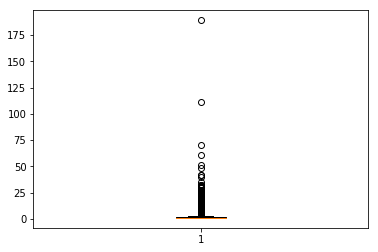

In [27]:
plt.boxplot(select_df['NUMBER_OF_SUBURB'])

In [28]:
print(df.shape)
df.head()

(104434, 13)


,Unnamed: 0,FULLVISITORID,PROPORTION_SEARCH_SALE,PROPORTION_SEARCH_LEASE,PROPORTION_SEARCH_SOLD,PROPORTION_SEARCH_BUSINESS,PROPORTION_LISTING_SALE,PROPORTION_LISTING_LEASE,PROPORTION_LISTING_SOLD,PROPORTION_LISTING_BUSINESS,PROPORTION_NEWS,POPULAR_PROPERTY_STATE,NUMBER_OF_SUBURB
0,0,5045100769048895194,0.000000,0.695652,0.0,0.000000,0.000000,0.26087,0.0,0.000000,0.0,TAS,4
1,1,4840635002640255347,0.666667,0.000000,0.0,0.000000,0.250000,0.00000,0.0,0.000000,0.0,VIC,1
2,2,3825443392590049574,0.000000,0.000000,0.0,0.833333,0.000000,0.00000,0.0,0.166667,0.0,VIC,1
3,3,9008231057747816558,0.000000,0.000000,0.0,0.000000,0.000000,1.00000,0.0,0.000000,0.0,VIC,1
4,4,4155251633421055572,0.595238,0.000000,0.0,0.000000,0.357143,0.00000,0.0,0.000000,0.0,VIC,3


In [30]:
# Scale data
X = StandardScaler().fit_transform(select_df)
random_state = 5
n = 10000
cap_silhouette = 20000
# Clustering - grid search of optimal hyperparameters
param_grid = np.array([(n_clusters, batch_size, score)
                       for n_clusters in range(5, 11)
                       for batch_size in [100, 500]
                       for score in [None]
                       ])
clusters = []
coefficient_scores = []

In [31]:
for index, (n_clusters, batch_size, score) in enumerate(param_grid):
    model =  MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=random_state)
    try:
        model.fit(X)
        labels = model.labels_
        score = metrics.silhouette_score(X, labels, sample_size = n if n < cap_silhouette else cap_silhouette)
        param_grid[index, 2] = score
    except Exception as e:
        print(e)

df_param_grid = pd.DataFrame(param_grid,
                             columns=['n_clusters', 'batch_size', 'score'])\
    .sort_values(by=['score'], ascending=False)

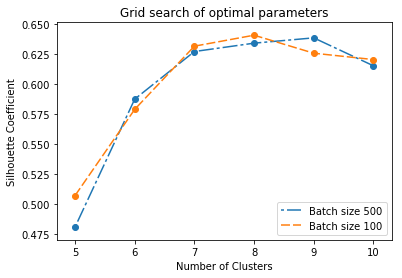

In [8]:
grid1 = df_param_grid[df_param_grid['batch_size'] == 500]
grid1 = grid1.sort_values('n_clusters')
grid2 = df_param_grid[df_param_grid['batch_size'] == 100]
grid2 = grid2.sort_values('n_clusters')

x = grid1['n_clusters'].values
y1 = grid1['score'].values
y2 = grid2['score'].values

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='Batch size 500')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
ax.scatter(grid1['n_clusters'].values, grid1['score'].values)

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, dashes=[6, 2], label='Batch size 100')
ax.scatter(grid1['n_clusters'].values, grid2['score'].values)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Grid search of optimal parameters')
ax.legend(loc='lower right')
plt.show()

# The graph shows that 6, 7, or 8 clusters could be useful


array([[-0.4640909 , -0.76695626,  3.77426278, ..., -0.37264683,
        -0.40278318,  1.53945859],
       [ 2.98785335, -0.14735027, -0.37978156, ..., -0.37264683,
        -0.40278318, -0.3985553 ],
       [-0.4640909 , -0.76695626, -0.37978156, ...,  3.99080661,
         0.27053531, -0.3985553 ],
       ...,
       [-0.4640909 ,  1.71146773, -0.37978156, ..., -0.37264683,
        -0.40278318, -0.3985553 ],
       [-0.4640909 , -0.76695626, -0.37978156, ..., -0.37264683,
        -0.40278318, -0.3985553 ],
       [-0.4640909 ,  1.71146773, -0.37978156, ..., -0.37264683,
        -0.40278318, -0.3985553 ]])

In [71]:
# Scale data
X = StandardScaler().fit_transform(select_df)

# Fit data into Kmean model with 6 clusters
kmeans = KMeans(n_clusters=6)
model = kmeans.fit(X)

In [114]:

# Characterise clusters
labels = model.labels_
df_x['cluster'] = labels
clusters_unique = np.unique(labels)
clusters_size = [None] * len(clusters_unique)
for cluster in clusters_unique:
    clusters_size[cluster] = len(df_x[df_x.cluster == cluster])

df_summary = pd.DataFrame(
    {
        'cluster': clusters_unique,
        'size': clusters_size,
        'prop_of_users': [x / n for x in clusters_size]
    }
)

for index, cluster in enumerate(df_summary.cluster):
    for col_name in features:
        if col_name == 'NUMBER_OF_SUBURB':
            df_summary.loc[index, col_name] = np.median(df_x.loc[df_x.cluster == cluster, col_name])
        else:
            df_summary.loc[index, col_name] = np.mean(df_x.loc[df_x.cluster == cluster, col_name])

df_summary = df_summary.round(3)
df_summary = df_summary.round({
    'NUMBER_OF_SUBURB': 0
})
df_summary['label'] = ['Newsers',
                       'Sold Listings Viewers',
                       'Moderate Renters',
                       'Warm Buyers',
                       'Moderate Buyers',
                       'Home Price Guide']
df_summary

,cluster,size,prop_of_users,PROPORTION_SEARCH_SALE,PROPORTION_LISTING_SALE,PROPORTION_SEARCH_LEASE,PROPORTION_LISTING_LEASE,PROPORTION_SEARCH_BUSINESS,PROPORTION_LISTING_BUSINESS,NUMBER_OF_SUBURB,label
0,0,43347,0.415,0.015,0.598,0.002,0.009,0.002,0.005,1.0,Newsers
1,1,12137,0.116,0.032,0.019,0.485,0.379,0.009,0.005,2.0,Sold Listings Viewers
2,2,15977,0.153,0.503,0.368,0.015,0.014,0.013,0.008,2.0,Moderate Renters
3,3,7022,0.067,0.003,0.004,0.001,0.002,0.069,0.897,1.0,Warm Buyers
4,4,14746,0.141,0.003,0.006,0.024,0.935,0.001,0.001,1.0,Moderate Buyers
5,5,11205,0.107,0.021,0.014,0.007,0.007,0.585,0.331,2.0,Home Price Guide


In [89]:
df_summary.iloc[:,3:10]


df = df_summary.iloc[:,3:10]
df.insert(loc=0, column='group', value=df_summary.iloc[:,0] )
df


,group,PROPORTION_SEARCH_SALE,PROPORTION_LISTING_SALE,PROPORTION_SEARCH_LEASE,PROPORTION_LISTING_LEASE,PROPORTION_SEARCH_BUSINESS,PROPORTION_LISTING_BUSINESS,NUMBER_OF_SUBURB
0,0,0.015,0.598,0.002,0.009,0.002,0.005,1.0
1,1,0.032,0.019,0.485,0.379,0.009,0.005,2.0
2,2,0.503,0.368,0.015,0.014,0.013,0.008,2.0
3,3,0.003,0.004,0.001,0.002,0.069,0.897,1.0
4,4,0.003,0.006,0.024,0.935,0.001,0.001,1.0
5,5,0.021,0.014,0.007,0.007,0.585,0.331,2.0


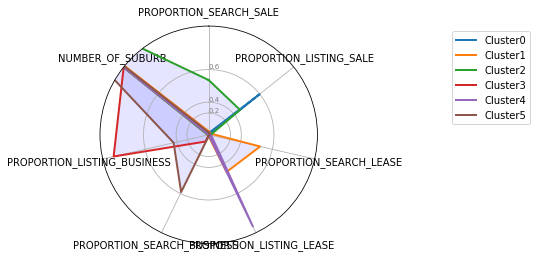

In [113]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
#df = pd.DataFrame({
#'group': ['A','B','C','D'],
#'var1': [38, 1.5, 30, 4],
#'var2': [29, 10, 9, 34],
#'var3': [8, 39, 23, 24],
#'var4': [7, 31, 33, 14],
#'var5': [28, 15, 32, 14]
#})


# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.3,0.6], ["0.2","0.4","0.6"], color="grey", size=7)
plt.ylim(0,1)

# ------- PART 2: Add plots

# Plot each individual = each line of the data

for i in range(N-1):
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Cluster" + str(i))
    ax.fill(angles, values, 'b', alpha=0.1)
    

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))